In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
DATA_PATH = "Training.csv"
data = pd.read_csv(DATA_PATH).dropna(axis=1)

In [3]:
data.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection


In [4]:
data.shape

(4920, 133)

In [5]:
disease_counts = data['prognosis'].value_counts()
print("Number of diseases: ", disease_counts.shape, "\n")
print(disease_counts)

Number of diseases:  (41,) 

Fungal infection                           120
Hepatitis C                                120
Hepatitis E                                120
Alcoholic hepatitis                        120
Tuberculosis                               120
Common Cold                                120
Pneumonia                                  120
Dimorphic hemmorhoids(piles)               120
Heart attack                               120
Varicose veins                             120
Hypothyroidism                             120
Hyperthyroidism                            120
Hypoglycemia                               120
Osteoarthristis                            120
Arthritis                                  120
(vertigo) Paroymsal  Positional Vertigo    120
Acne                                       120
Urinary tract infection                    120
Psoriasis                                  120
Hepatitis D                                120
Hepatitis B                    

In [6]:
temp_df = pd.DataFrame({"Disease":disease_counts.index, "Counts":disease_counts.values})
temp_df

,Disease,Counts
0,Fungal infection,120
1,Hepatitis C,120
2,Hepatitis E,120
3,Alcoholic hepatitis,120
4,Tuberculosis,120
5,Common Cold,120
6,Pneumonia,120
7,Dimorphic hemmorhoids(piles),120
8,Heart attack,120
9,Varicose veins,120


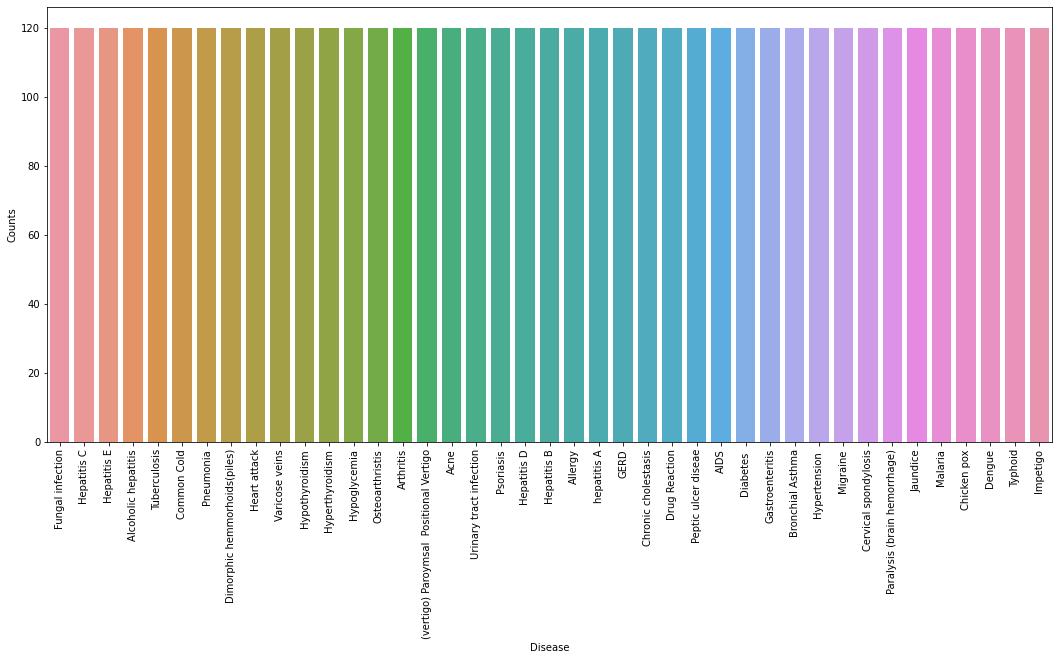

In [7]:
plt.figure(figsize=(18,8))
sns.barplot(x='Disease', y='Counts', data=temp_df)
plt.xticks(rotation=90)
plt.show()

In [8]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
itching,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
skin_rash,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
nodal_skin_eruptions,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
continuous_sneezing,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1
shivering,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blister,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yellow_crust_ooze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
encoder = LabelEncoder()
data['prognosis'] = encoder.fit_transform(data['prognosis'])

In [10]:
# Save encoder classes to a numpy file
np.save('encoder_classes.npy', encoder.classes_)

In [11]:
print(encoder.classes_)

['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [12]:
data.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
itching,1,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0
skin_rash,1,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0
nodal_skin_eruptions,1,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
continuous_sneezing,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,1,1,1,1
shivering,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
blister,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
red_sore_around_nose,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
yellow_crust_ooze,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


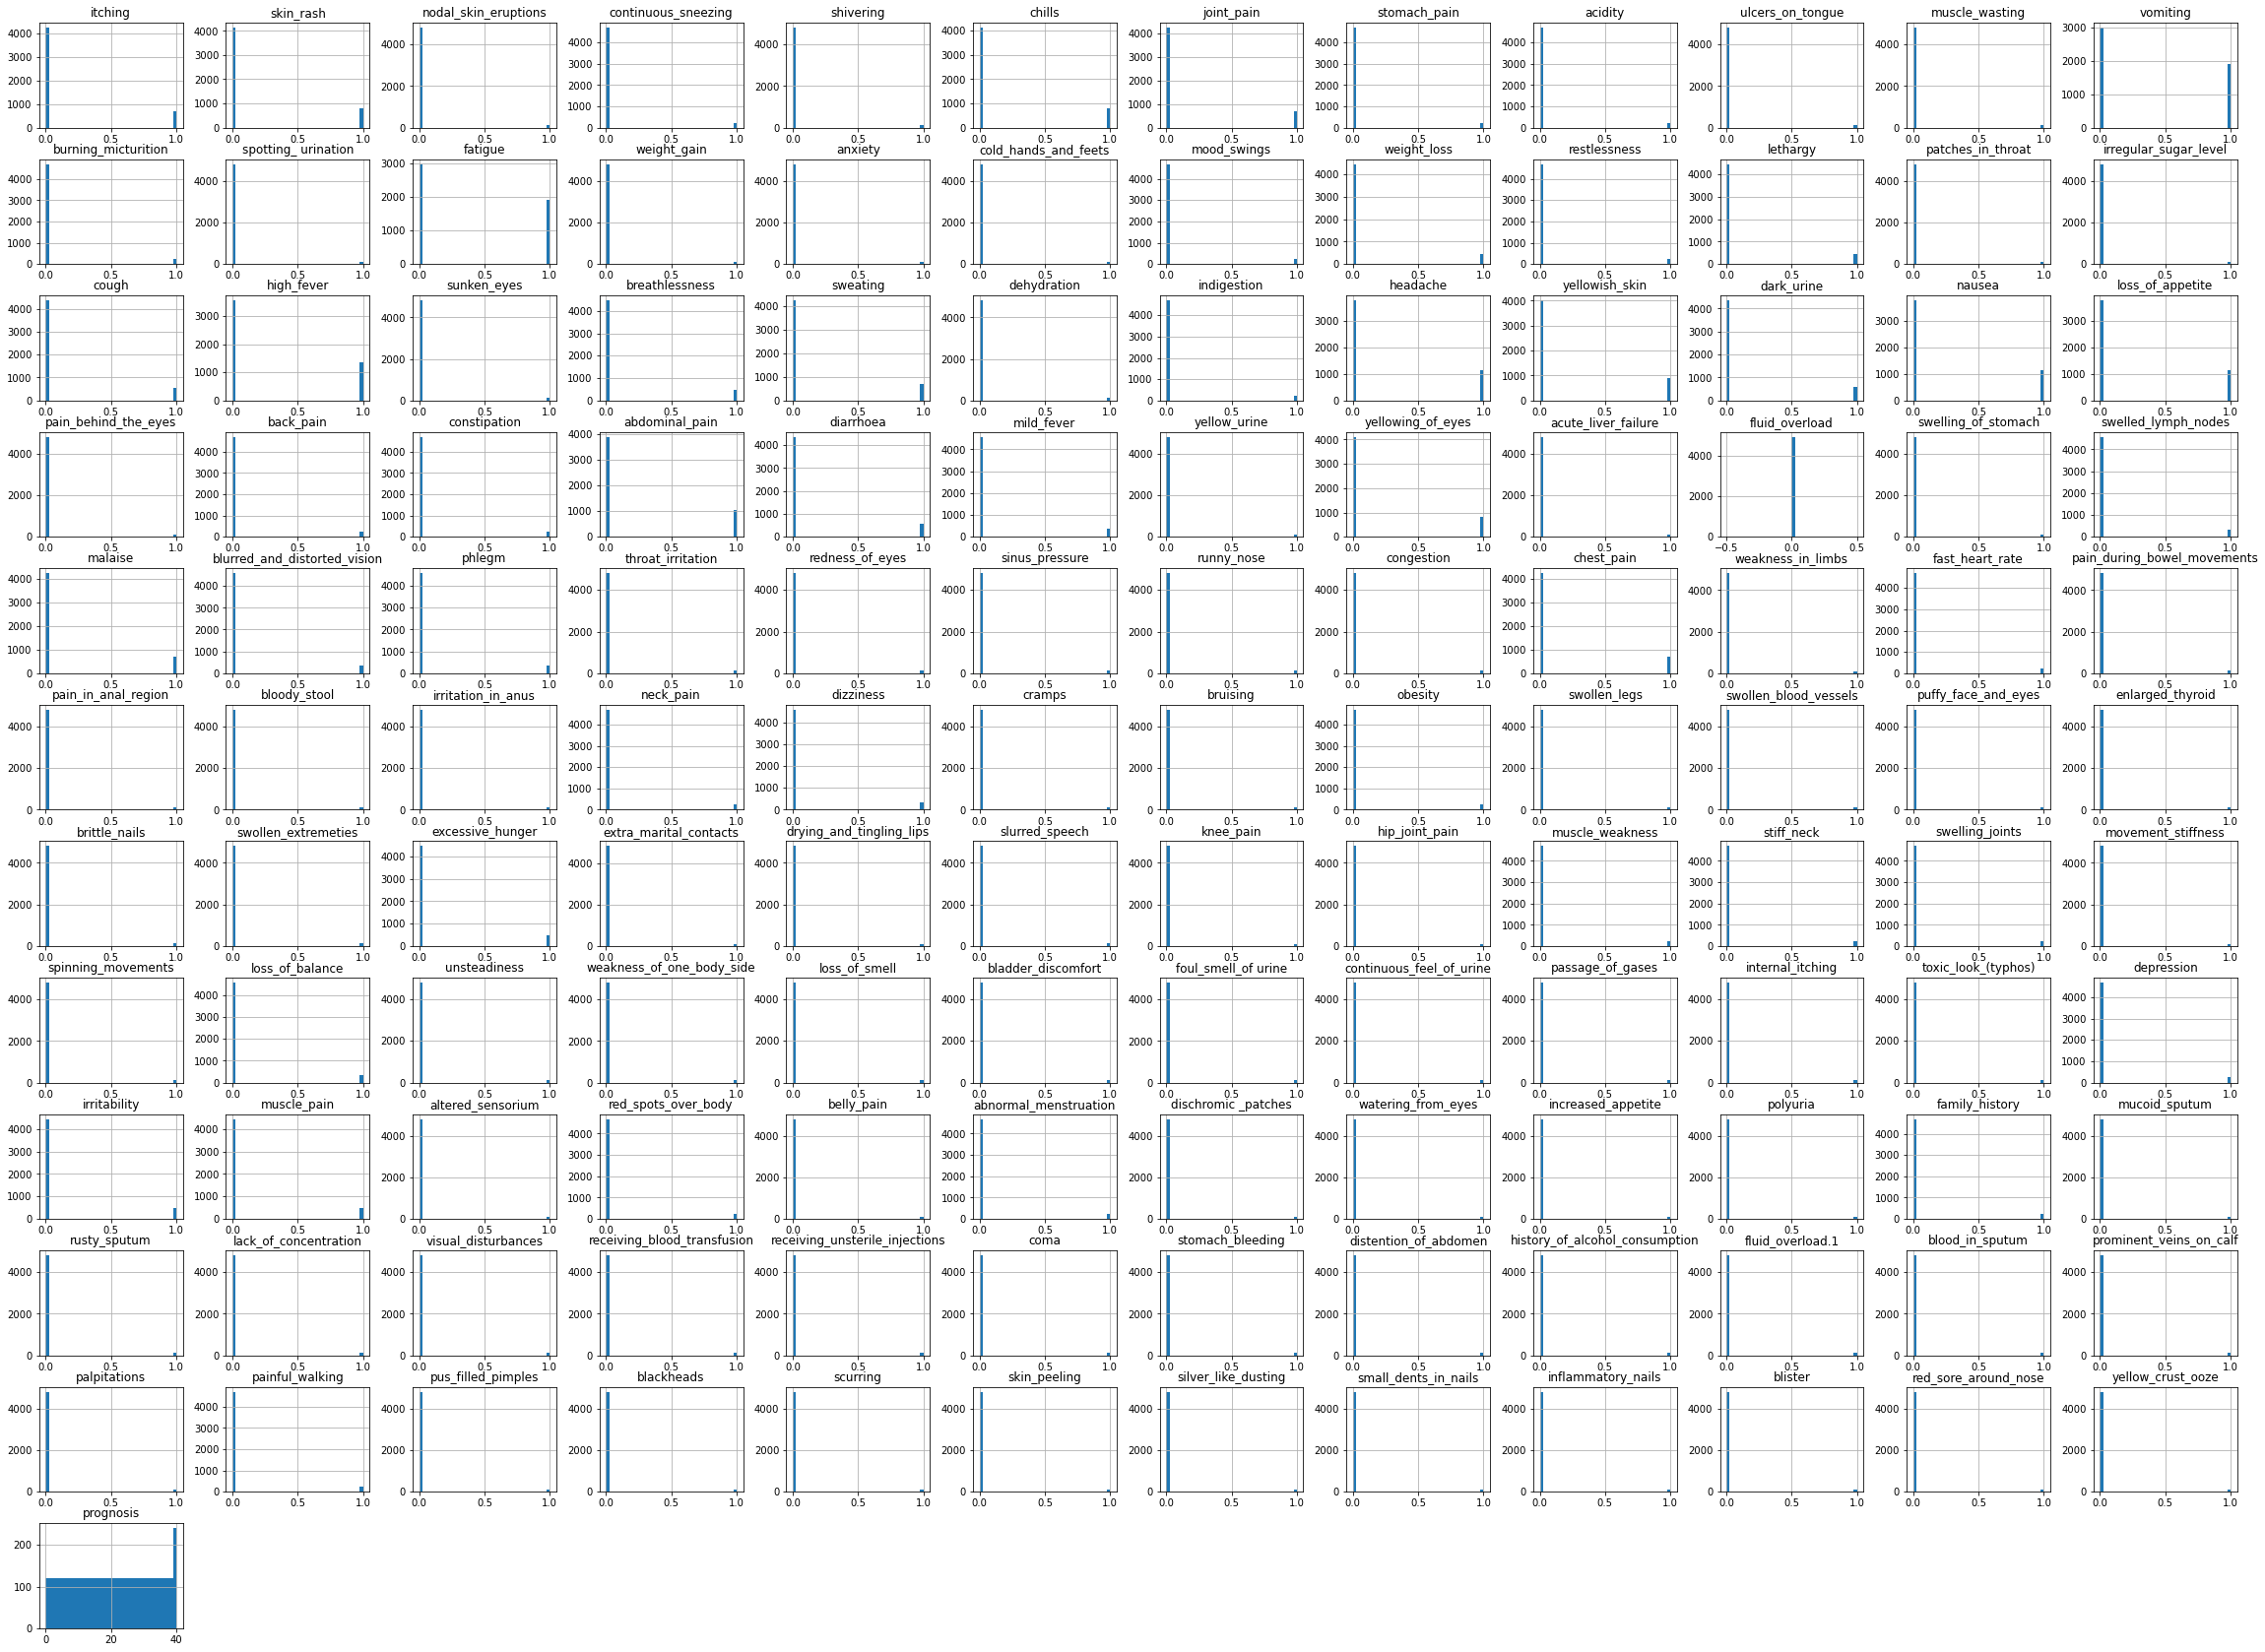

In [13]:
data.hist(bins=40, figsize=(40, 30))
plt.show()

In [14]:
corrmat = data.corr()
corrmat

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
itching,1.000000,0.318158,0.326439,-0.086906,-0.059893,-0.175905,-0.160650,0.202850,-0.086906,-0.059893,...,-0.059893,-0.059893,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.061573,-0.151898
skin_rash,0.318158,1.000000,0.298143,-0.094786,-0.065324,-0.029324,0.171134,0.161784,-0.094786,-0.065324,...,0.320859,0.320859,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,0.331087,-0.146564
nodal_skin_eruptions,0.326439,0.298143,1.000000,-0.032566,-0.022444,-0.065917,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.063307
continuous_sneezing,-0.086906,-0.094786,-0.032566,1.000000,0.608981,0.446238,-0.087351,-0.047254,-0.047254,-0.032566,...,-0.032566,-0.032566,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.033480,-0.237346
shivering,-0.059893,-0.065324,-0.022444,0.608981,1.000000,0.295332,-0.060200,-0.032566,-0.032566,-0.022444,...,-0.022444,-0.022444,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.023073,-0.202584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
inflammatory_nails,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,0.359845,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,0.946120,0.946120,0.946120,1.000000,-0.023720,-0.023720,-0.023720,0.195249
blister,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,1.000000,0.946120,0.946120,0.091116
red_sore_around_nose,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,1.000000,0.946120,0.091116
yellow_crust_ooze,-0.061573,0.331087,-0.023073,-0.033480,-0.023073,-0.067765,-0.061889,-0.033480,-0.033480,-0.023073,...,-0.023073,-0.023073,-0.023720,-0.023720,-0.023720,-0.023720,0.946120,0.946120,1.000000,0.091116


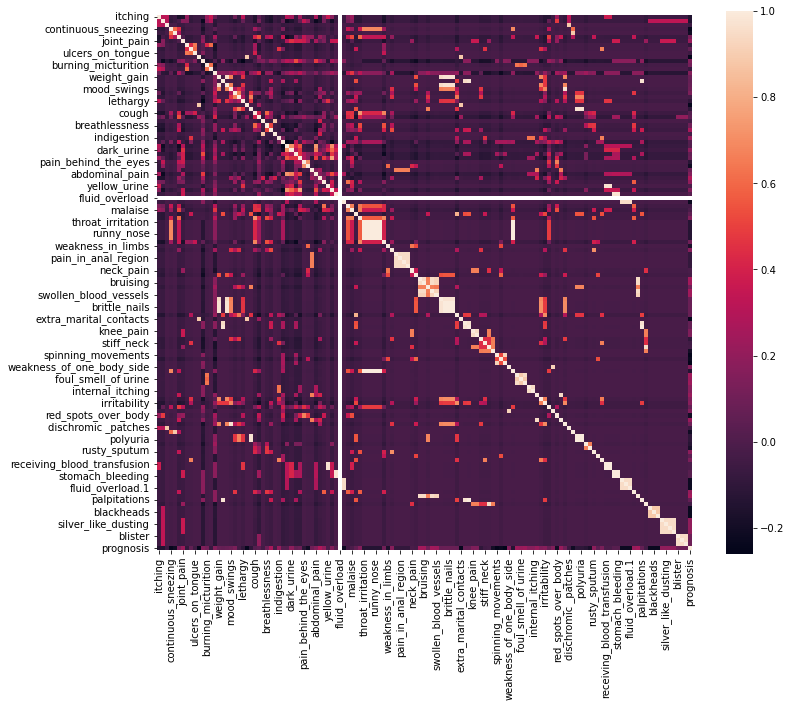

In [15]:
fig = plt.figure(figsize=(12,10))
sns.heatmap(corrmat, vmax=1, square=True)
plt.show()

In [16]:
X = data.drop('prognosis', axis=1)
y = data.prognosis

In [17]:
X

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4915,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4916,0,1,0,0,0,0,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4917,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4918,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,1,1,1,0,0,0


In [18]:
y

0       15
1       15
2       15
3       15
4       15
        ..
4915     0
4916     2
4917    38
4918    35
4919    27
Name: prognosis, Length: 4920, dtype: int32

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [20]:
print(f"Train: {X_train.shape}, {y_train.shape}")
print(f"Test: {X_test.shape}, {y_test.shape}")

Train: (3936, 132), (3936,)
Test: (984, 132), (984,)


In [21]:
def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

In [22]:
models = {
    "SVC":SVC(),
    "Gaussian NB":GaussianNB(),
    "RandomForest":RandomForestClassifier(random_state=18)
}

In [23]:
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring=cv_scoring)
    
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

SVC
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
Gaussian NB
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0
RandomForest
Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score: 1.0


In [24]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
preds = svm_model.predict(X_test)

In [25]:
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(y_train, svm_model.predict(X_train))*100}")

print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on train data by SVM Classifier: 100.0
Accuracy on test data by SVM Classifier: 100.0


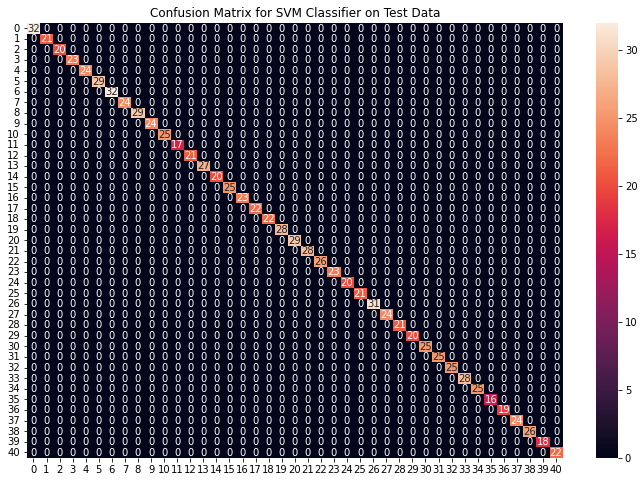

In [26]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for SVM Classifier on Test Data")
plt.show()

In [27]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
preds = nb_model.predict(X_test)

In [28]:
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(y_train, nb_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(y_test, preds)*100}")

Accuracy on train data by Naive Bayes Classifier: 100.0
Accuracy on test data by Naive Bayes Classifier: 100.0


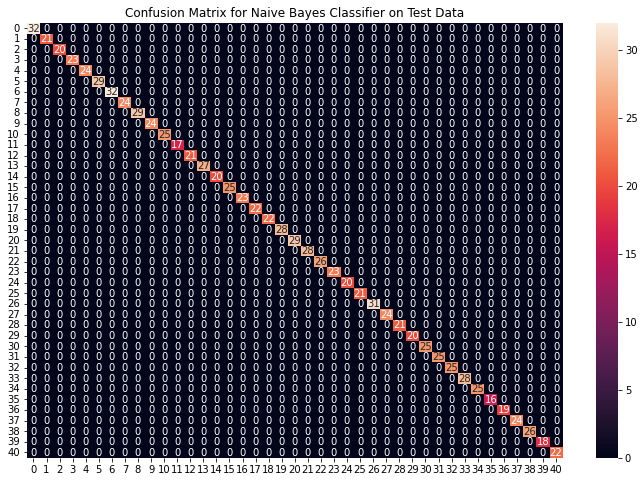

In [29]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Naive Bayes Classifier on Test Data")
plt.show()

In [30]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, y_train)
preds = rf_model.predict(X_test)

In [31]:
print(f"Accuracy on train data by Random Forest Classifier: {accuracy_score(y_train, rf_model.predict(X_train))*100}")
 
print(f"Accuracy on test data by Random Forest Classifier: {accuracy_score(y_test, preds)*100}")

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


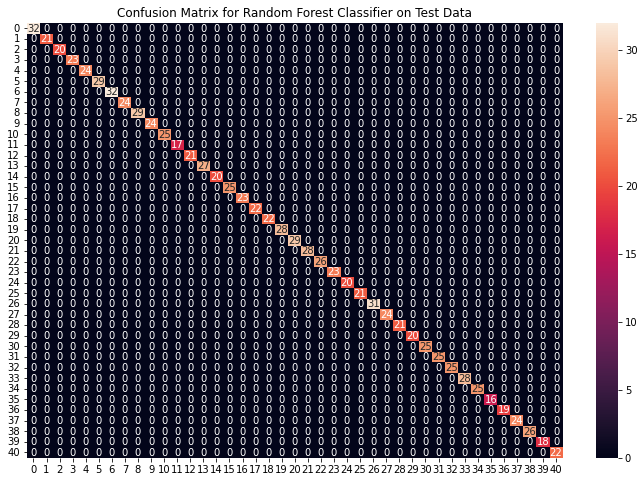

In [32]:
cf_matrix = confusion_matrix(y_test, preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot=True)
plt.title("Confusion Matrix for Random Forest Classifier on Test Data")
plt.show()

In [33]:
test_data = pd.read_csv("Testing.csv")
test_X = test_data.drop('prognosis', axis=1)
test_Y = encoder.transform(test_data.prognosis)

In [34]:
models = [SVC(), GaussianNB(), RandomForestClassifier(random_state=18)]
preds = []
for i in range(3):
    models[i] = models[i].fit(X, y)
    preds.append(models[i].predict(test_X)) 

In [35]:
preds

[array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
        11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
        31,  5,  0,  2, 38, 35, 27, 15]),
 array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
        11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
        31,  5,  0,  2, 38, 35, 27, 15]),
 array([15,  4, 16,  9, 14, 33,  1, 12, 17,  6, 23, 30,  7, 32, 28, 29,  8,
        11, 37, 40, 19, 20, 21, 22,  3, 36, 10, 34, 13, 18, 39, 26, 24, 25,
        31,  5,  0,  2, 38, 35, 27,  8])]

In [36]:
final_preds = [mode([i,j,k])[0][0] for i,j,k in zip(*preds)]
final_preds

[15,
 4,
 16,
 9,
 14,
 33,
 1,
 12,
 17,
 6,
 23,
 30,
 7,
 32,
 28,
 29,
 8,
 11,
 37,
 40,
 19,
 20,
 21,
 22,
 3,
 36,
 10,
 34,
 13,
 18,
 39,
 26,
 24,
 25,
 31,
 5,
 0,
 2,
 38,
 35,
 27,
 15]

In [37]:
print(f"Accuracy on Test dataset by the combined model: {accuracy_score(test_Y, final_preds)*100}")

Accuracy on Test dataset by the combined model: 100.0


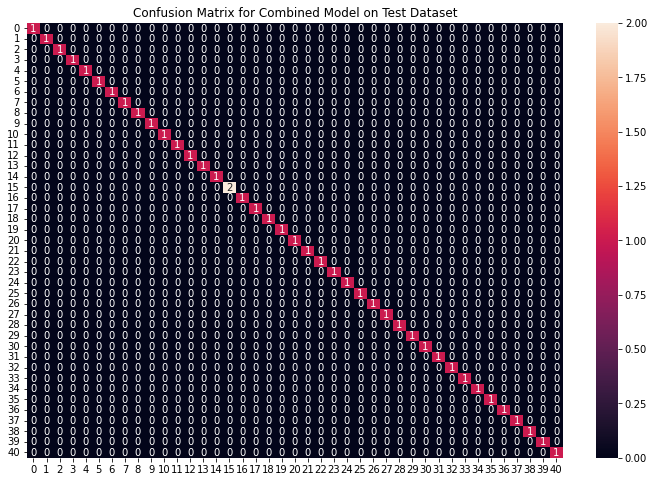

In [38]:
cf_matrix = confusion_matrix(test_Y, final_preds)
plt.figure(figsize=(12,8))
sns.heatmap(cf_matrix, annot = True)
plt.title("Confusion Matrix for Combined Model on Test Dataset")
plt.show()

In [39]:
symptoms = X.columns.values

In [40]:
for i in symptoms:
    print(i)

itching
skin_rash
nodal_skin_eruptions
continuous_sneezing
shivering
chills
joint_pain
stomach_pain
acidity
ulcers_on_tongue
muscle_wasting
vomiting
burning_micturition
spotting_ urination
fatigue
weight_gain
anxiety
cold_hands_and_feets
mood_swings
weight_loss
restlessness
lethargy
patches_in_throat
irregular_sugar_level
cough
high_fever
sunken_eyes
breathlessness
sweating
dehydration
indigestion
headache
yellowish_skin
dark_urine
nausea
loss_of_appetite
pain_behind_the_eyes
back_pain
constipation
abdominal_pain
diarrhoea
mild_fever
yellow_urine
yellowing_of_eyes
acute_liver_failure
fluid_overload
swelling_of_stomach
swelled_lymph_nodes
malaise
blurred_and_distorted_vision
phlegm
throat_irritation
redness_of_eyes
sinus_pressure
runny_nose
congestion
chest_pain
weakness_in_limbs
fast_heart_rate
pain_during_bowel_movements
pain_in_anal_region
bloody_stool
irritation_in_anus
neck_pain
dizziness
cramps
bruising
obesity
swollen_legs
swollen_blood_vessels
puffy_face_and_eyes
enlarged_thyroi

In [41]:
len(symptoms)

132

In [42]:
symptom_index = {}
for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split("_")])
    symptom_index[symptom] = index

In [43]:
symptom_index

{'Itching': 0,
 'Skin Rash': 1,
 'Nodal Skin Eruptions': 2,
 'Continuous Sneezing': 3,
 'Shivering': 4,
 'Chills': 5,
 'Joint Pain': 6,
 'Stomach Pain': 7,
 'Acidity': 8,
 'Ulcers On Tongue': 9,
 'Muscle Wasting': 10,
 'Vomiting': 11,
 'Burning Micturition': 12,
 'Spotting  urination': 13,
 'Fatigue': 14,
 'Weight Gain': 15,
 'Anxiety': 16,
 'Cold Hands And Feets': 17,
 'Mood Swings': 18,
 'Weight Loss': 19,
 'Restlessness': 20,
 'Lethargy': 21,
 'Patches In Throat': 22,
 'Irregular Sugar Level': 23,
 'Cough': 24,
 'High Fever': 25,
 'Sunken Eyes': 26,
 'Breathlessness': 27,
 'Sweating': 28,
 'Dehydration': 29,
 'Indigestion': 30,
 'Headache': 31,
 'Yellowish Skin': 32,
 'Dark Urine': 33,
 'Nausea': 34,
 'Loss Of Appetite': 35,
 'Pain Behind The Eyes': 36,
 'Back Pain': 37,
 'Constipation': 38,
 'Abdominal Pain': 39,
 'Diarrhoea': 40,
 'Mild Fever': 41,
 'Yellow Urine': 42,
 'Yellowing Of Eyes': 43,
 'Acute Liver Failure': 44,
 'Fluid Overload': 45,
 'Swelling Of Stomach': 46,
 'Swelle

In [44]:
data_dict = {
    "symptom_index":symptom_index,
    "predictions_classes":encoder.classes_
}

In [45]:
def predictDisease(symptoms):
    symptoms = symptoms.split(",")
    input_data = [0]*len(data_dict['symptom_index'])
    for symptom in symptoms:
        index = data_dict['symptom_index'][symptom]
        input_data[index] = 1
    input_data = np.array(input_data).reshape(1,-1)
    
    models_prediction = []
    for i in range(3):
        models_prediction.append(data_dict["predictions_classes"][models[i].predict(input_data)[0]])
    final_prediction = mode([*models_prediction])[0][0]
    predictions = {
        "rf_model_prediction": models_prediction[0],
        "naive_bayes_prediction": models_prediction[1],
        "svm_model_prediction": models_prediction[2],
        "final_prediction":final_prediction
    }
    return final_prediction

In [46]:
print(predictDisease("Itching,Skin Rash,Nodal Skin Eruptions"))

Fungal infection


In [51]:
disease_descriptions = pd.read_csv('symptom_Description.csv')
disease_description = disease_descriptions[disease_descriptions['Disease'] == 'Fungal infection']['Description'].values[0]


In [52]:
disease_description

'In humans, fungal infections occur when an invading fungus takes over an area of the body and is too much for the immune system to handle. Fungi can live in the air, soil, water, and plants. There are also some fungi that live naturally in the human body. Like many microbes, there are helpful fungi and harmful fungi.'

In [64]:
prec = pd.read_csv('symptom_precaution.csv')
precs = prec[prec['Disease'] == 'Fungal infection'].values[0]

In [65]:
precs

array(['Fungal infection', 'bath twice',
       'use detol or neem in bathing water', 'keep infected area dry',
       'use clean cloths'], dtype=object)

In [61]:
disease_description[0]

'bath twice'

In [67]:
dataset = pd.read_csv('dataset.csv')
dataset.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
symps = dataset[dataset['Disease'] == 'Fungal infection'].values[0]

In [69]:
symps

array(['Fungal infection', 'itching', ' skin_rash',
       ' nodal_skin_eruptions', ' dischromic _patches', nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan], dtype=object)

In [128]:
dataset = pd.read_csv('dataset.csv')
symps = dataset[dataset['Disease'] == 'Fungal infection'].iloc[0]
symps = symps.where(pd.notna(symps), None)
symps_json = symps.to_dict()

In [129]:
final_symps = []
for i in symps:
    if(i != None and i != 'Fungal infection'):
        final_symps.append((" ").join(i.title().strip().split('_')))
final_symps

['Itching', 'Skin Rash', 'Nodal Skin Eruptions', 'Dischromic  Patches']

In [130]:
symps_json

{'Disease': 'Fungal infection',
 'Symptom_1': 'itching',
 'Symptom_2': ' skin_rash',
 'Symptom_3': ' nodal_skin_eruptions',
 'Symptom_4': ' dischromic _patches',
 'Symptom_5': None,
 'Symptom_6': None,
 'Symptom_7': None,
 'Symptom_8': None,
 'Symptom_9': None,
 'Symptom_10': None,
 'Symptom_11': None,
 'Symptom_12': None,
 'Symptom_13': None,
 'Symptom_14': None,
 'Symptom_15': None,
 'Symptom_16': None,
 'Symptom_17': None}

In [131]:
severity = pd.read_csv('Symptom-severity.csv')

In [132]:
severity

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5
...,...,...
128,inflammatory_nails,2
129,blister,4
130,red_sore_around_nose,2
131,yellow_crust_ooze,3


In [137]:
severity['Symptom'] = severity['Symptom'].str.replace('_', ' ').str.title()

In [138]:
severity

,Symptom,weight
0,Itching,1
1,Skin Rash,3
2,Nodal Skin Eruptions,4
3,Continuous Sneezing,4
4,Shivering,5
...,...,...
128,Inflammatory Nails,2
129,Blister,4
130,Red Sore Around Nose,2
131,Yellow Crust Ooze,3


In [139]:
severity.to_csv('Symptom-severity.csv', index=False)

In [1]:
final_symps = ['Itching', 'Skin Rash', 'Nodal Skin Eruptions', 'Dischromic  Patches']

In [4]:
import pandas as  pd
severity = pd.read_csv('Symptom-severity.csv')

In [5]:
severity

,Symptom,weight
0,Itching,1
1,Skin Rash,3
2,Nodal Skin Eruptions,4
3,Continuous Sneezing,4
4,Shivering,5
...,...,...
128,Inflammatory Nails,2
129,Blister,4
130,Red Sore Around Nose,2
131,Yellow Crust Ooze,3


In [25]:
sumval = 0
cnt = 0
for i in final_symps:
    if i in 
        matching_symptoms = severity[severity['Symptom'] == i]['weight']
        if not matching_symptoms.empty:
            weight = matching_symptoms.values[0]
            cnt += 1
            sumval += weight
severness = round((sumval / (cnt * 10)) * 100, 2)

26.67


In [27]:
severity[severity['Symptom'] == 'Abdominal Pain']['weight'].values[0]

4

In [28]:
severity[severity['Symptom'] == 'Abnormal Menstruation']['weight'].values[0]

6

In [33]:
selected_symptoms = ['Itching','Skin Rash']
selectedseverity = 0
all_seve = 0
cnt = 0
for i in selected_symptoms:
    matching_symptoms = severity[severity['Symptom'] == i]['weight']
    if not matching_symptoms.empty:
        weight = matching_symptoms.values[0]
        selectedseverity += weight
for i in final_symps:
    matching_symptoms = severity[severity['Symptom'] == i]['weight']
    if not matching_symptoms.empty:
        weight = matching_symptoms.values[0]
        cnt += 1
        all_seve += weight
print((selectedseverity/all_seve)*100)

50.0


In [32]:
final_symps

['Itching', 'Skin Rash', 'Nodal Skin Eruptions', 'Dischromic  Patches']

In [5]:
import pandas as pd
severity = pd.DataFrame({
    'Symptom': ['Itching', 'Skin Rash', 'Nodal Skin Eruptions','Dischromic  Patches'],
    'Weight': [1, 3, 4, 4, 5, 2]
})
reported_symptoms = ['Itching', 'Skin Rash']
weights = severity[severity['Symptom'].isin(reported_symptoms)]['Weight'].tolist()
total_severity = sum(weights)
normalized_severity = (total_severity / (len(reported_symptoms) * 10)) * 100
print(f'Total Severity: {total_severity}')
print(f'Normalized Severity: {normalized_severity:.2f}')

ValueError: All arrays must be of the same length

In [35]:
weights

[1, 3]

In [1]:
4/20

0.4

In [3]:
0.4*(8/40)*100

8.000000000000002